# # **Case Study 1: How Does a Bike-Share Navigate Speedy Success?**

Author: Masaya Sugimoto

Date: 06/18/2021

In this case study, I am going to follow "The APPASA process" (Ask - Prepare - Process - Analyze - Share - Act) to complete the assignment. 

# Background

**Scenario**

I am a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members. 

**About the company**

In 2016, Cyclistic launched a successful bike-share o ering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, The director of marketing believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, she believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.


**The goal of this case study**

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

The director of marketing has assigned me the first question to answer: How do annual members and casual riders use Cyclistic bikes differently? 

In this assignment, I will produce a report with the following deliverables:
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of my analysis
5. Supporting visualizations and key findings

# **Ask**

1. Business Task 
In order to maximize the number of annual membership, I, data analyst, will find trend and patterns among casual riders and membership riders, and identify potential riders who can get benefit from annual membership. I do not need to raise awareness of annual membership among casual riders as they are already aware of the program. 

2. Stakeholders
- The director of marketing
- The marketing analysis team
- Cyclistic's Executive team

3. Stakeholder's expectation
Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. The marketing team is interested in analyzing the Cyclistic historical bike trip data to identify trends.


# **Prepare**

1. DATA TYPE check
2. ROOOC Check 
*     Sampling bias
*     Observer bias
*     Interpretation bias
*     Confirmation bias

About the data set:

Since Cyclistic is a fictional company, I will use Divvy’s, a bike-share program based in Chicago, data from May 2020 – April 2021 to complete this case study. To download the data, please use [this link](http://divvy-tripdata.s3.amazonaws.com/index.html). This data was made public by Motivate International Inc, under [this license](http://www.divvybikes.com/data-license-agreement). Due to data privacy issues, personal information has been removed or encrypted.

In [ ]:
library(tidyverse)  #helps wrangle data
library(lubridate)  #helps wrangle date attributes
library(ggplot2)  #helps visualize data
library(dplyr) #helps clean data
library(tidyr) #helps clean data

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
library(geosphere)

In [3]:
# Read the trip data from 202005 - 202104 (12 months)
tripdata_2020_05 <- read.csv("../input/tripsdata-202005202104/202005-divvy-tripdata.csv")
tripdata_2020_06 <- read.csv("../input/tripsdata-202005202104/202006-divvy-tripdata.csv")
tripdata_2020_07 <- read.csv("../input/tripsdata-202005202104/202007-divvy-tripdata.csv")
tripdata_2020_08 <- read.csv("../input/tripsdata-202005202104/202008-divvy-tripdata.csv")
tripdata_2020_09 <- read.csv("../input/tripsdata-202005202104/202009-divvy-tripdata.csv")
tripdata_2020_10 <- read.csv("../input/tripsdata-202005202104/202010-divvy-tripdata.csv")
tripdata_2020_11 <- read.csv("../input/tripsdata-202005202104/202011-divvy-tripdata.csv")
tripdata_2020_12 <- read.csv("../input/tripsdata-202005202104/202012-divvy-tripdata.csv")
tripdata_2021_01 <- read.csv("../input/tripsdata-202005202104/202101-divvy-tripdata.csv")
tripdata_2021_02 <- read.csv("../input/tripsdata-202005202104/202102-divvy-tripdata.csv")
tripdata_2021_03 <- read.csv("../input/tripsdata-202005202104/202103-divvy-tripdata.csv")
tripdata_2021_04 <- read.csv("../input/tripsdata-202005202104/202104-divvy-tripdata.csv")

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [ ]:
#DATA CHECK 
colnames(tripdata_2020_05)
colnames(tripdata_2020_06)
colnames(tripdata_2020_07)
colnames(tripdata_2020_08)
colnames(tripdata_2020_09)
colnames(tripdata_2020_10)
colnames(tripdata_2020_11)
colnames(tripdata_2020_12)
colnames(tripdata_2021_01)
colnames(tripdata_2021_02)
colnames(tripdata_2021_03)
colnames(tripdata_2021_04)
# Confirmed none of column name should be changed

In [5]:
#DATA CHECK 
str(tripdata_2020_05)
str(tripdata_2020_06)
str(tripdata_2020_07)
str(tripdata_2020_08)
str(tripdata_2020_09)
str(tripdata_2020_10)
str(tripdata_2020_11)
str(tripdata_2020_12)
str(tripdata_2021_01)
str(tripdata_2021_02)
str(tripdata_2021_03)
str(tripdata_2021_04)
# Confirmed 

'data.frame':	200274 obs. of  13 variables:
 $ ride_id           : chr  "02668AD35674B983" "7A50CCAF1EDDB28F" "2FFCDFDB91FE9A52" "58991CF1DB75BA84" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : chr  "2020-05-27 10:03:52" "2020-05-25 10:47:11" "2020-05-02 14:11:03" "2020-05-02 16:25:36" ...
 $ ended_at          : chr  "2020-05-27 10:16:49" "2020-05-25 11:05:40" "2020-05-02 15:48:21" "2020-05-02 16:39:28" ...
 $ start_station_name: chr  "Franklin St & Jackson Blvd" "Clark St & Wrightwood Ave" "Kedzie Ave & Milwaukee Ave" "Clarendon Ave & Leland Ave" ...
 $ start_station_id  : int  36 340 260 251 261 206 261 180 331 219 ...
 $ end_station_name  : chr  "Wabash Ave & Grand Ave" "Clark St & Leland Ave" "Kedzie Ave & Milwaukee Ave" "Lake Shore Dr & Wellington Ave" ...
 $ end_station_id    : int  199 326 260 157 206 22 261 180 300 305 ...
 $ start_lat         : num  41.9 41.9 41.9 42 41.9 ...
 $ start_lng         : num  -87.6

In [6]:
#Covert some data types (from Double to Character) to merge
tripdata_2020_05 <-  mutate(tripdata_2020_05, start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata_2020_06 <-  mutate(tripdata_2020_06, start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata_2020_07 <-  mutate(tripdata_2020_07, start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata_2020_08 <-  mutate(tripdata_2020_08, start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata_2020_09 <-  mutate(tripdata_2020_09, start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata_2020_10 <-  mutate(tripdata_2020_10, start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))
tripdata_2020_11 <-  mutate(tripdata_2020_11, start_station_id = as.character(start_station_id), end_station_id = as.character(end_station_id))


In [7]:
#Combine all the data sets
all_trips <- bind_rows(tripdata_2020_05, tripdata_2020_06, tripdata_2020_07, tripdata_2020_08, tripdata_2020_09, tripdata_2020_10, tripdata_2020_11, tripdata_2020_12, tripdata_2021_01, tripdata_2021_02, tripdata_2021_03, tripdata_2021_04)


# **Process**
Data Cleaning before conducting analysis

Due to the large data set, I will use R for data cleaning and data analysis. 

In [8]:
colnames(all_trips)  #List of column names

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [9]:
nrow(all_trips)  #How many rows are in data frame?

[1] 3742202

In [10]:
dim(all_trips)  #Dimensions of the data frame? 

[1] 3742202      13

In [11]:
head(all_trips)  #See the first 6 rows of data frame.  

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,02668AD35674B983,docked_bike,2020-05-27 10:03:52,2020-05-27 10:16:49,Franklin St & Jackson Blvd,36,Wabash Ave & Grand Ave,199,41.8777,-87.6353,41.8915,-87.6268,member
2,7A50CCAF1EDDB28F,docked_bike,2020-05-25 10:47:11,2020-05-25 11:05:40,Clark St & Wrightwood Ave,340,Clark St & Leland Ave,326,41.9295,-87.6431,41.9671,-87.6674,casual
3,2FFCDFDB91FE9A52,docked_bike,2020-05-02 14:11:03,2020-05-02 15:48:21,Kedzie Ave & Milwaukee Ave,260,Kedzie Ave & Milwaukee Ave,260,41.9296,-87.7079,41.9296,-87.7079,casual
4,58991CF1DB75BA84,docked_bike,2020-05-02 16:25:36,2020-05-02 16:39:28,Clarendon Ave & Leland Ave,251,Lake Shore Dr & Wellington Ave,157,41.9680,-87.6500,41.9367,-87.6368,casual
5,A79651EFECC268CD,docked_bike,2020-05-29 12:49:54,2020-05-29 13:27:11,Hermitage Ave & Polk St,261,Halsted St & Archer Ave,206,41.8715,-87.6699,41.8472,-87.6468,member
6,1466C5B39F68F746,docked_bike,2020-05-29 13:27:24,2020-05-29 14:14:45,Halsted St & Archer Ave,206,May St & Taylor St,22,41.8472,-87.6468,41.8695,-87.6555,member


In [12]:
str(all_trips)  #See list of columns and data types (numeric, character, etc)
# You can also confirm each columns' data type here

'data.frame':	3742202 obs. of  13 variables:
 $ ride_id           : chr  "02668AD35674B983" "7A50CCAF1EDDB28F" "2FFCDFDB91FE9A52" "58991CF1DB75BA84" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : chr  "2020-05-27 10:03:52" "2020-05-25 10:47:11" "2020-05-02 14:11:03" "2020-05-02 16:25:36" ...
 $ ended_at          : chr  "2020-05-27 10:16:49" "2020-05-25 11:05:40" "2020-05-02 15:48:21" "2020-05-02 16:39:28" ...
 $ start_station_name: chr  "Franklin St & Jackson Blvd" "Clark St & Wrightwood Ave" "Kedzie Ave & Milwaukee Ave" "Clarendon Ave & Leland Ave" ...
 $ start_station_id  : chr  "36" "340" "260" "251" ...
 $ end_station_name  : chr  "Wabash Ave & Grand Ave" "Clark St & Leland Ave" "Kedzie Ave & Milwaukee Ave" "Lake Shore Dr & Wellington Ave" ...
 $ end_station_id    : chr  "199" "326" "260" "157" ...
 $ start_lat         : num  41.9 41.9 41.9 42 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.7 -87.7 -87.7 ...
 

In [13]:
summary(all_trips)  #Statistical summary of data. Mainly for numerics
#Confirmed there are 5006 NA columns in end_lat and end_lat

   ride_id          rideable_type       started_at          ended_at        
 Length:3742202     Length:3742202     Length:3742202     Length:3742202    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:3742202     Length:3742202     Length:3742202     Length:3742202    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [14]:
# Add columns that list the date, month, day, and year of each ride as we might need to aggregate ride data for each month, day, or year.
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

In [15]:
#Confirmed additional columns have been added
colnames(all_trips)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "date"               "month"             
[16] "day"                "year"               "day_of_week"

In [16]:
# Add a "ride_length" calculation to all_trips (in seconds) so that I can compare ride length for each ride
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/difftime.html
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)


In [17]:
# Convert "ride_length" from Double to numeric so we can run calculations on the data
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

[1] TRUE

**Remove bad data**

1. Remove ride length is less than 0 second and is > 1440 minutes as ride length shouldn't be either negative or more than one day

In [18]:
# Remove "bad" data
# The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative
#Create a new data frame without records that have ride length <= zero minute OR > 1440 minutes
all_trips_v2 <- all_trips[!(all_trips$ride_length <= 0 | all_trips$ride_length > 1440),]

In [19]:
#Check the new data frame
dim(all_trips_v2) 
View(all_trips_v2)
summary(all_trips_v2)
#Confirmed the total number of rows is 2,664,700 (down from 3,850,936 - decreased by 30% - significant but necessary removals.
#1,241 NAs Remains in end_lat and end_long 

[1] 2664700      19

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week,ride_length
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,02668AD35674B983,docked_bike,2020-05-27 10:03:52,2020-05-27 10:16:49,Franklin St & Jackson Blvd,36,Wabash Ave & Grand Ave,199,41.8777,-87.6353,41.8915,-87.6268,member,2020-05-27,05,27,2020,Wednesday,777
2,7A50CCAF1EDDB28F,docked_bike,2020-05-25 10:47:11,2020-05-25 11:05:40,Clark St & Wrightwood Ave,340,Clark St & Leland Ave,326,41.9295,-87.6431,41.9671,-87.6674,casual,2020-05-25,05,25,2020,Monday,1109
4,58991CF1DB75BA84,docked_bike,2020-05-02 16:25:36,2020-05-02 16:39:28,Clarendon Ave & Leland Ave,251,Lake Shore Dr & Wellington Ave,157,41.9680,-87.6500,41.9367,-87.6368,casual,2020-05-02,05,02,2020,Saturday,832
9,23AFBD962F9C8F14,docked_bike,2020-05-30 17:00:58,2020-05-30 17:19:52,Halsted St & Clybourn Ave,331,Broadway & Barry Ave,300,41.9097,-87.6481,41.9377,-87.6441,casual,2020-05-30,05,30,2020,Saturday,1134
11,DF3BE94DF2CB082E,docked_bike,2020-05-28 14:29:23,2020-05-28 14:43:46,Fairbanks Ct & Grand Ave,24,Mies van der Rohe Way & Chestnut St,145,41.8918,-87.6206,41.8986,-87.6219,casual,2020-05-28,05,28,2020,Thursday,863
12,6AA701EBA46EAF9A,docked_bike,2020-05-24 08:39:50,2020-05-24 08:58:22,Canal St & Adams St,192,Indiana Ave & Roosevelt Rd,255,41.8793,-87.6399,41.8679,-87.6230,member,2020-05-24,05,24,2020,Sunday,1112
16,9D3F29466533D0A9,docked_bike,2020-05-02 20:48:54,2020-05-02 21:06:30,Sheffield Ave & Fullerton Ave,67,Orleans St & Chestnut St (NEXT Apts),620,41.9256,-87.6537,41.8982,-87.6375,casual,2020-05-02,05,02,2020,Saturday,1056
18,CDAEA6AC2DEDF077,docked_bike,2020-05-25 16:23:49,2020-05-25 16:46:57,Western Ave & Division St,305,McClurg Ct & Illinois St,26,41.9029,-87.6873,41.8904,-87.6175,member,2020-05-25,05,25,2020,Monday,1388
21,73FB492713920CD8,docked_bike,2020-05-10 00:11:22,2020-05-10 00:19:48,Michigan Ave & 18th St,273,Wabash Ave & 9th St,321,41.8578,-87.6246,41.8708,-87.6257,casual,2020-05-10,05,10,2020,Sunday,506


   ride_id          rideable_type       started_at          ended_at        
 Length:2664700     Length:2664700     Length:2664700     Length:2664700    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:2664700     Length:2664700     Length:2664700     Length:2664700    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

2. Remove NA data from the all_trips_v2 to get accurate data.

In [20]:
#Drop all NAs
all_trips_v2 <- drop_na(all_trips_v2)
dim(all_trips_v2) 
summary(all_trips_v2)
# Confirmed all the NA is gone.

[1] 2563234      19

   ride_id          rideable_type       started_at          ended_at        
 Length:2563234     Length:2563234     Length:2563234     Length:2563234    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:2563234     Length:2563234     Length:2563234     Length:2563234    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

3. Remove duplicated ID as I confirmed ride ID is associated with each ride, not riders.

In [21]:
#Remove duplicated ID (confirmed different ride_id is assigned for every rides even if same rider uses this service):
all_trips_v3 <- all_trips_v2[!duplicated(all_trips_v2$ride_id),]
dim(all_trips_v3) 
# Confirmed 2,563,234 remained (Original data has 3,850,936 >>> Valid)

[1] 2563234      19

Data Cleaning/Validation process has been completed at this point.

Next, I am going to create additional columns for further analysis.

In [22]:
#Find out the distance for each ride:
all_trips_v3$ride_distance <- distGeo(matrix(c(all_trips_v3$start_lng, all_trips_v3$start_lat), ncol = 2), matrix(c(all_trips_v3$end_lng, all_trips_v3$end_lat), ncol = 2))
View(all_trips_v3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week,ride_length,ride_distance
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,02668AD35674B983,docked_bike,2020-05-27 10:03:52,2020-05-27 10:16:49,Franklin St & Jackson Blvd,36,Wabash Ave & Grand Ave,199,41.8777,-87.6353,41.8915,-87.6268,member,2020-05-27,05,27,2020,Wednesday,777,1687.3498
2,7A50CCAF1EDDB28F,docked_bike,2020-05-25 10:47:11,2020-05-25 11:05:40,Clark St & Wrightwood Ave,340,Clark St & Leland Ave,326,41.9295,-87.6431,41.9671,-87.6674,casual,2020-05-25,05,25,2020,Monday,1109,4636.9667
3,58991CF1DB75BA84,docked_bike,2020-05-02 16:25:36,2020-05-02 16:39:28,Clarendon Ave & Leland Ave,251,Lake Shore Dr & Wellington Ave,157,41.9680,-87.6500,41.9367,-87.6368,casual,2020-05-02,05,02,2020,Saturday,832,3644.7653
4,23AFBD962F9C8F14,docked_bike,2020-05-30 17:00:58,2020-05-30 17:19:52,Halsted St & Clybourn Ave,331,Broadway & Barry Ave,300,41.9097,-87.6481,41.9377,-87.6441,casual,2020-05-30,05,30,2020,Saturday,1134,3127.6597
5,DF3BE94DF2CB082E,docked_bike,2020-05-28 14:29:23,2020-05-28 14:43:46,Fairbanks Ct & Grand Ave,24,Mies van der Rohe Way & Chestnut St,145,41.8918,-87.6206,41.8986,-87.6219,casual,2020-05-28,05,28,2020,Thursday,863,762.9504
6,6AA701EBA46EAF9A,docked_bike,2020-05-24 08:39:50,2020-05-24 08:58:22,Canal St & Adams St,192,Indiana Ave & Roosevelt Rd,255,41.8793,-87.6399,41.8679,-87.6230,member,2020-05-24,05,24,2020,Sunday,1112,1889.8511
7,9D3F29466533D0A9,docked_bike,2020-05-02 20:48:54,2020-05-02 21:06:30,Sheffield Ave & Fullerton Ave,67,Orleans St & Chestnut St (NEXT Apts),620,41.9256,-87.6537,41.8982,-87.6375,casual,2020-05-02,05,02,2020,Saturday,1056,3326.9309
8,CDAEA6AC2DEDF077,docked_bike,2020-05-25 16:23:49,2020-05-25 16:46:57,Western Ave & Division St,305,McClurg Ct & Illinois St,26,41.9029,-87.6873,41.8904,-87.6175,member,2020-05-25,05,25,2020,Monday,1388,5956.4023
9,73FB492713920CD8,docked_bike,2020-05-10 00:11:22,2020-05-10 00:19:48,Michigan Ave & 18th St,273,Wabash Ave & 9th St,321,41.8578,-87.6246,41.8708,-87.6257,casual,2020-05-10,05,10,2020,Sunday,506,1446.8039


In [23]:
summary(all_trips_v3)

   ride_id          rideable_type       started_at          ended_at        
 Length:2563234     Length:2563234     Length:2563234     Length:2563234    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:2563234     Length:2563234     Length:2563234     Length:2563234    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

# **Analyze**

Firstly, let's find out the number of ride by type of rider.

In [24]:
#Assign the correct order to each day of the week
all_trips_v3$day_of_week <- 
    ordered(all_trips_v3$day_of_week, levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))

In [25]:
all_trips_v3 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(number_of_ride = n(), .groups = 'drop') %>%
    arrange(day_of_week)

member_casual,day_of_week,number_of_ride
<chr>,<ord>,<int>
casual,Monday,88572
member,Monday,231921
casual,Tuesday,92296
member,Tuesday,250047
casual,Wednesday,98815
member,Wednesday,263679
casual,Thursday,103132
member,Thursday,259795
casual,Friday,129456


In [26]:
#Assign the correct order to each month of the year
all_trips_v3$month <-
    ordered(all_trips_v3$month, levels = c('05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04'))

In [27]:
all_trips_v3 %>%
    group_by(member_casual, month) %>%
    summarise(number_of_ride = n(), .groups = 'drop') %>%
    arrange(month)

member_casual,month,number_of_ride
<chr>,<ord>,<int>
casual,05,38338
member,05,81473
casual,06,75219
member,06,141811
casual,07,127215
member,07,218495
casual,08,151319
member,08,259497
casual,09,127284


**Findings:** 
1. Casual riders are more likely to take a ride on weekend while membership riders use on weekday more often.
2. Summer is the peak season for both rider types

Now, I would like to find out whether ride_length can be different depends on rider type.

In [28]:
aggregate(all_trips_v3$ride_length ~ all_trips_v3$member_casual + all_trips_v3$day_of_week, FUN=mean)

all_trips_v3$member_casual,all_trips_v3$day_of_week,all_trips_v3$ride_length
<chr>,<ord>,<dbl>
casual,Monday,742.9120
member,Monday,609.9813
casual,Tuesday,736.7501
member,Tuesday,612.7068
casual,Wednesday,740.2803
member,Wednesday,614.7010
casual,Thursday,737.5044
member,Thursday,614.8445
casual,Friday,753.6000


In [29]:
all_trips_v3 %>%
    group_by(member_casual, month) %>%
    summarise(average_ride_length = mean(ride_length), .groups = 'drop') %>%
    arrange(month)

member_casual,month,average_ride_length
<chr>,<ord>,<dbl>
casual,05,834.5905
member,05,702.9041
casual,06,829.4752
member,06,702.5155
casual,07,815.8336
member,07,683.9441
casual,08,782.0655
member,08,650.5190
casual,09,752.9538


**Findings:**
1. Membership rider's trip is longer than casual ones regardless of the season or day
2. All users take longer trips over weekend and summer

Next, check whether how each type of rider use the bike by looking at ride distance.


In [30]:
all_trips_v3 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(distance_of_ride = mean(ride_distance), .groups = 'drop') %>%
    arrange(day_of_week)

member_casual,day_of_week,distance_of_ride
<chr>,<ord>,<dbl>
casual,Monday,1863.994
member,Monday,1812.882
casual,Tuesday,1913.062
member,Tuesday,1830.566
casual,Wednesday,1940.004
member,Wednesday,1836.210
casual,Thursday,1934.997
member,Thursday,1835.670
casual,Friday,1895.011


In [31]:
all_trips_v3 %>%
    group_by(member_casual, month) %>%
    summarise(distance_of_ride = mean(ride_distance), .groups = 'drop') %>%
    arrange(month)

member_casual,month,distance_of_ride
<chr>,<ord>,<dbl>
casual,05,1930.300
member,05,1869.286
casual,06,1995.919
member,06,1917.247
casual,07,1910.681
member,07,1912.749
casual,08,1912.236
member,08,1881.013
casual,09,1943.037


**Findings:**
1. While Casual rider has slightly longer distance trip on weekday, membership ride's slighly longer over weekend.
2. All users take slightly longer distance trip in Spring

Finaly, in order to support my assumption, let's find out how many riders use the same bike station for start point and end point (ride_distance = 0).  

In [32]:
all_trips_v3 %>%
    group_by(member_casual) %>%
    summarize(number_of_rides = n() , .groups = 'drop')

member_casual,number_of_rides
<chr>,<int>
casual,822966
member,1740268


In [33]:
all_trips_v3 %>%
    group_by(member_casual) %>%
    filter(ride_distance < 1) %>%
    summarize(number_of_rides = n() , .groups = 'drop')

member_casual,number_of_rides
<chr>,<int>
casual,58284
member,72786


**Finding:**

While 6% of casual riders return their bike to their start point station, 4% of membership rider returns at their start point station. 

# Share

Here, I would like to share visualizations which would allow executives to understand my conclusion easily.

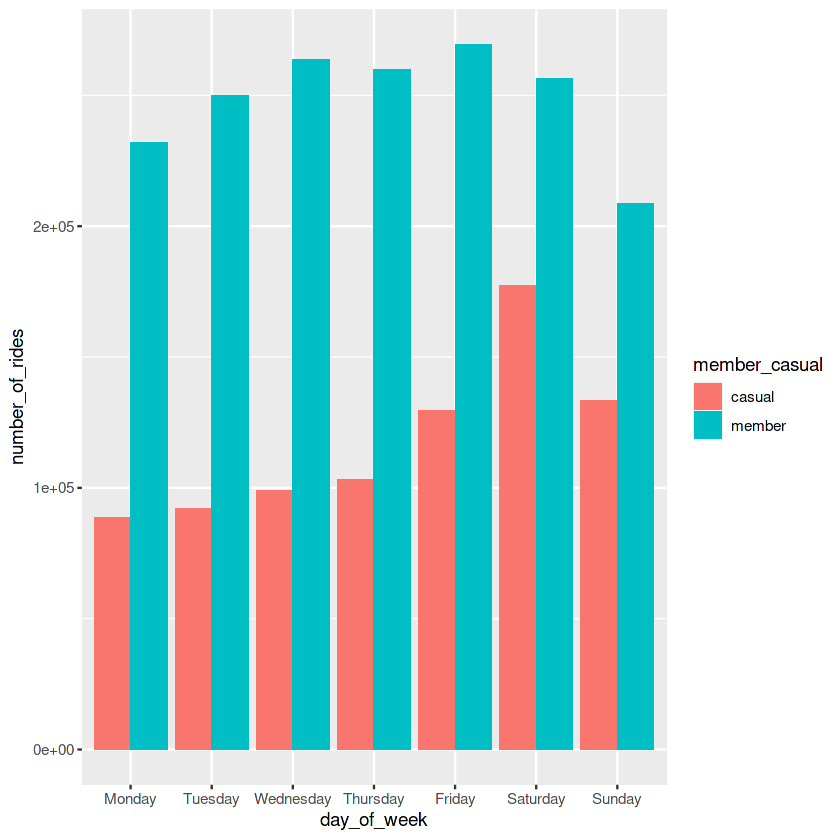

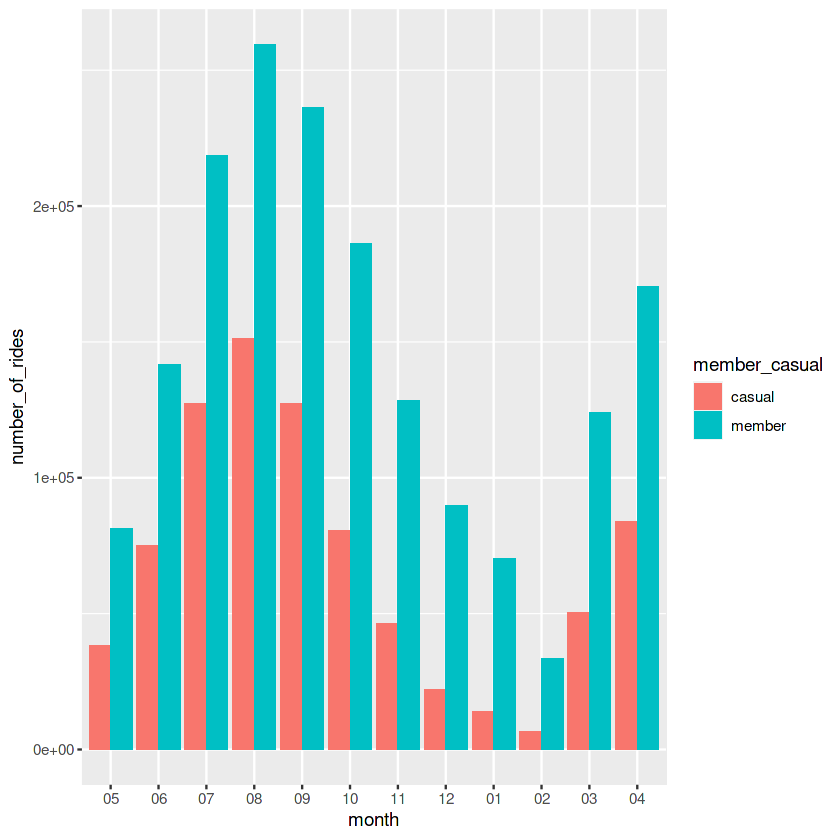

In [34]:
all_trips_v3 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(number_of_rides = n(), .groups = 'drop') %>%
    ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")

all_trips_v3 %>%
    group_by(member_casual, month) %>%
    summarise(number_of_rides = n(), .groups = 'drop') %>%
    ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")

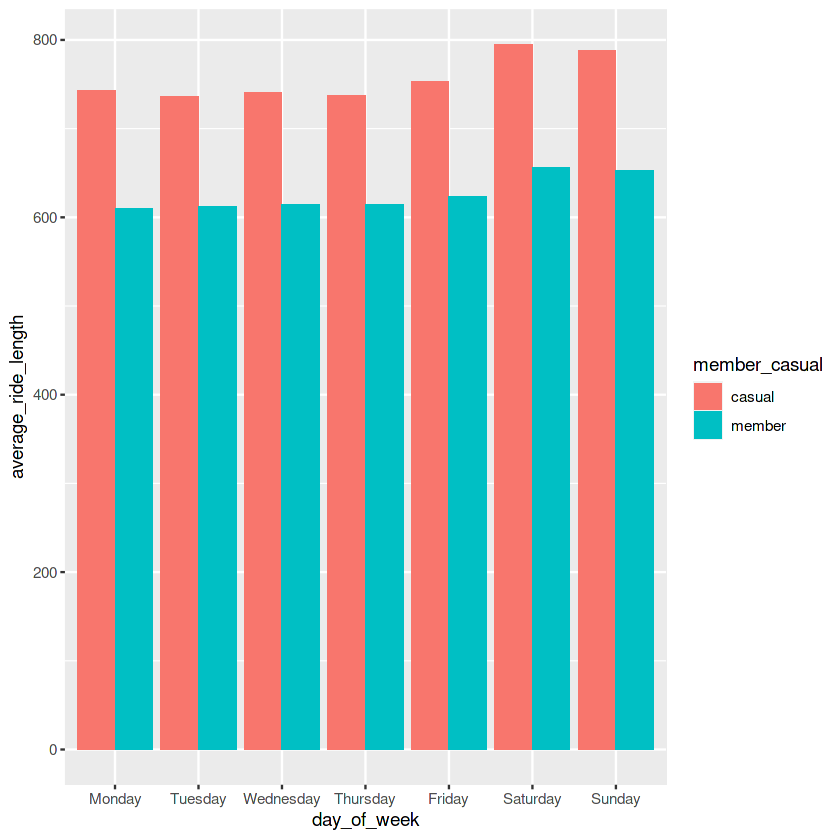

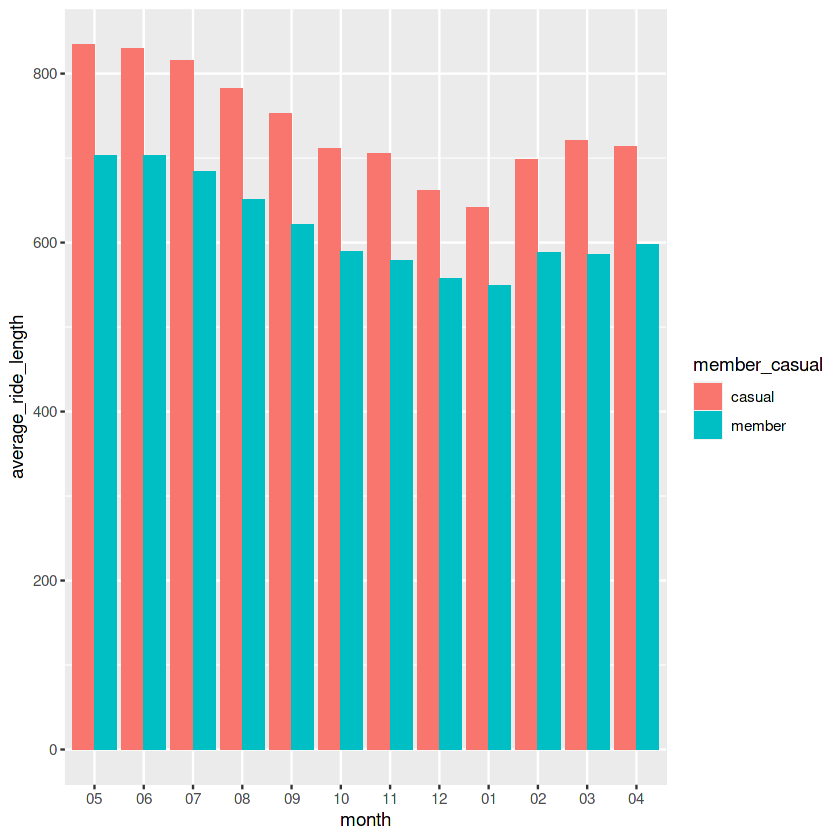

In [35]:
all_trips_v3 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(average_ride_length = mean(ride_length), .groups = 'drop') %>%
    ggplot(aes(x = day_of_week, y = average_ride_length, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")

all_trips_v3 %>%
    group_by(member_casual, month) %>%
    summarise(average_ride_length = mean(ride_length), .groups = 'drop') %>%
    ggplot(aes(x = month, y = average_ride_length, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



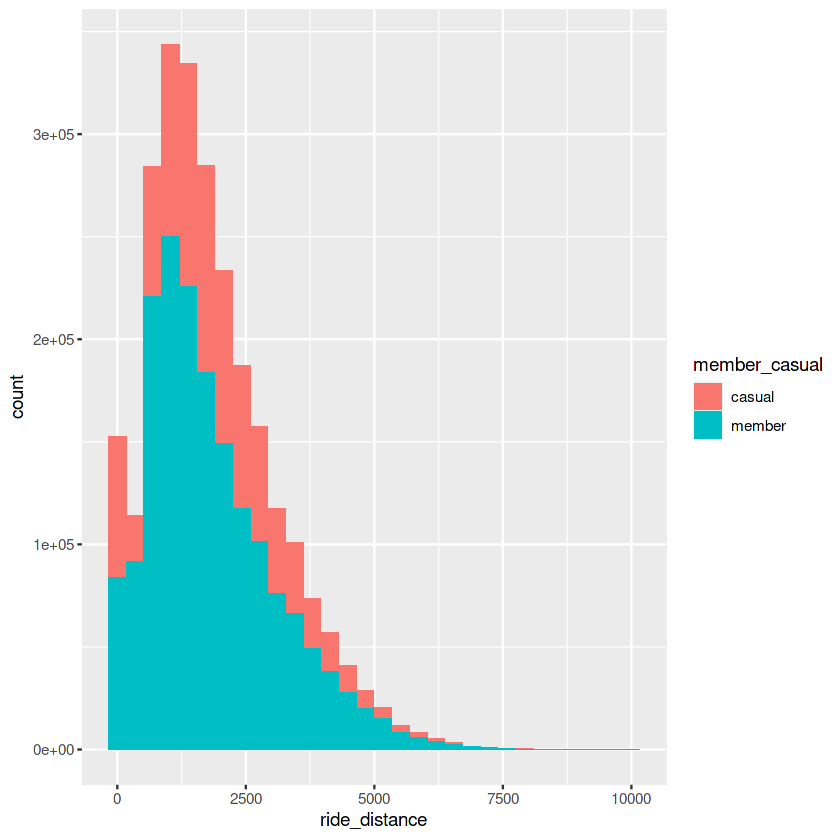

In [36]:
all_trips_v3 %>%
    group_by(member_casual) %>%
    filter(ride_distance < 10000) %>% #Remove outliner
    ggplot(aes(x = ride_distance, fill = member_casual)) + 
    geom_histogram() #Disregard binwidth 

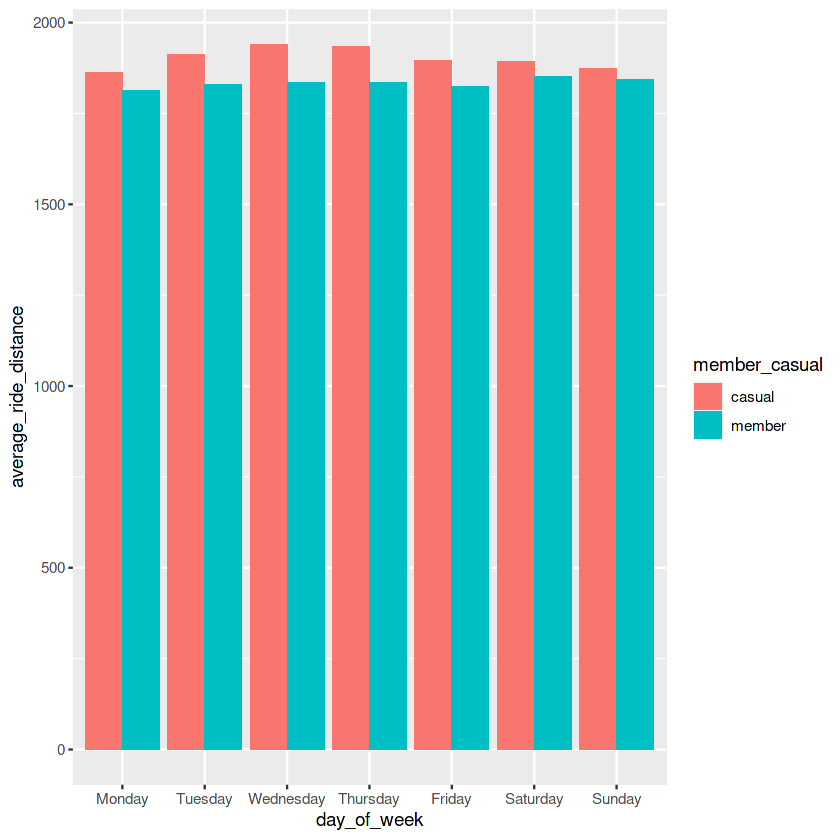

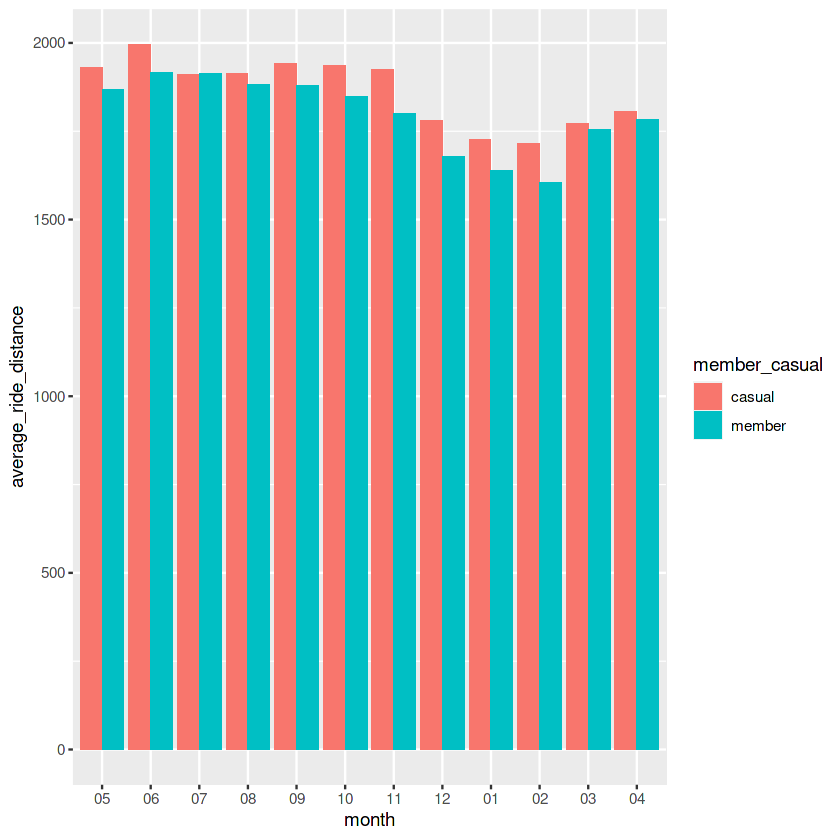

In [37]:
all_trips_v3 %>%
    group_by(member_casual, day_of_week) %>%
    summarise(average_ride_distance = mean(ride_distance), .groups = 'drop') %>%
    ggplot(aes(x = day_of_week, y = average_ride_distance, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")

all_trips_v3 %>%
    group_by(member_casual, month) %>%
    summarise(average_ride_distance = mean(ride_distance), .groups = 'drop') %>%
    ggplot(aes(x = month, y = average_ride_distance, fill = member_casual)) + 
    geom_bar(position = "dodge", stat = "identity")

**Analysis:**
1. It seems that the casual users travel the same average distance than the member users, but they have relatively longer rides, that would indicate a more leisure oriented usage vs a more "public transport" or pragmatic use of the bikes by the annual members.
2. Casual riders are more likely to return their bikes at the same station.
3. Additionaly, while that membership riders are more active on weekday, casual riders use the service more often over weekend. It lead me to conclude that membership riders use this service for their commute while casual rider use it for fun. 

**Conclusion:**

1)The Casual users have leisure, and tourism rides mostly on weekends.

2)The Annual users have commute or pragmatic rides during weekdays.